<a href="https://colab.research.google.com/github/Visa110804/Time-series-forecasting/blob/main/Temperature_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Upload CSV file to Colab
from google.colab import files
uploaded = files.upload()


Saving Weather_Data.csv to Weather_Data.csv


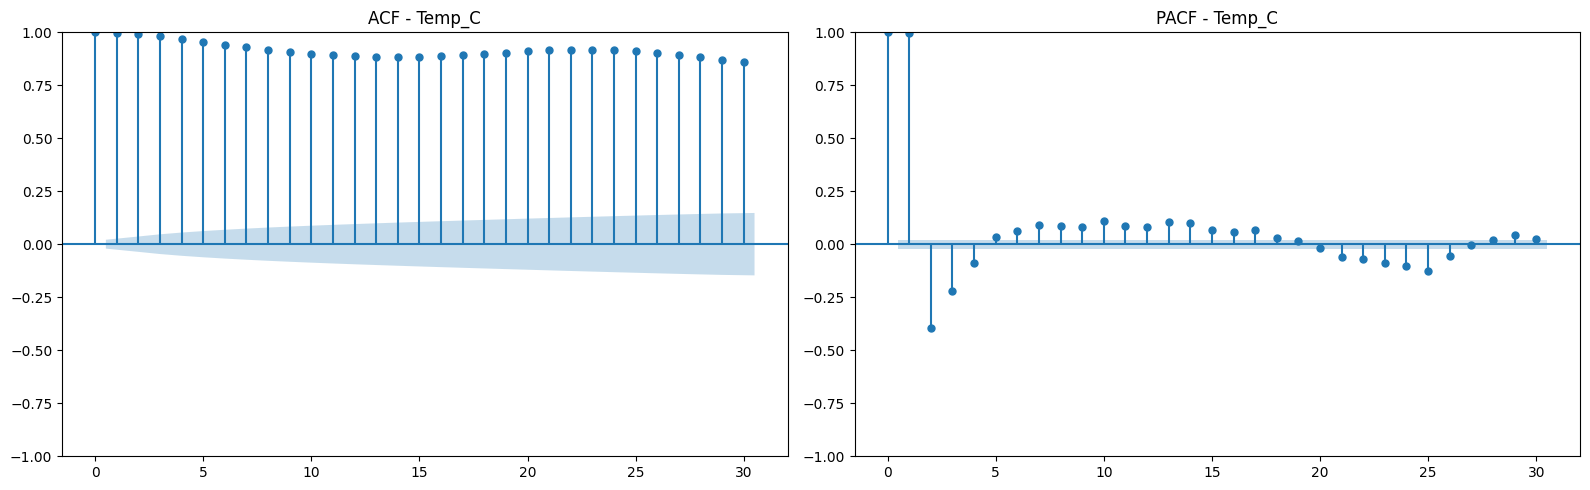

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load your dataset (replace with your actual file path)
df = pd.read_csv('Weather_Data.csv')

# Ensure Date/Time is parsed correctly
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date/Time', inplace=True)

# Optionally, resample to daily if your data is hourly
# df = df.resample('D').mean()

# Drop missing values
df = df.dropna()

# Choose the target variable
target_variable = 'Temp_C'

# Plot ACF and PACF for Temp_C
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

plot_acf(df[target_variable], lags=30, ax=axes[0])
axes[0].set_title('ACF - Temp_C')

plot_pacf(df[target_variable], lags=30, ax=axes[1], method='ywm')  # use method='ywm' to avoid warnings
axes[1].set_title('PACF - Temp_C')

plt.tight_layout()
plt.show()


/tmp/ipython-input-2738243032.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


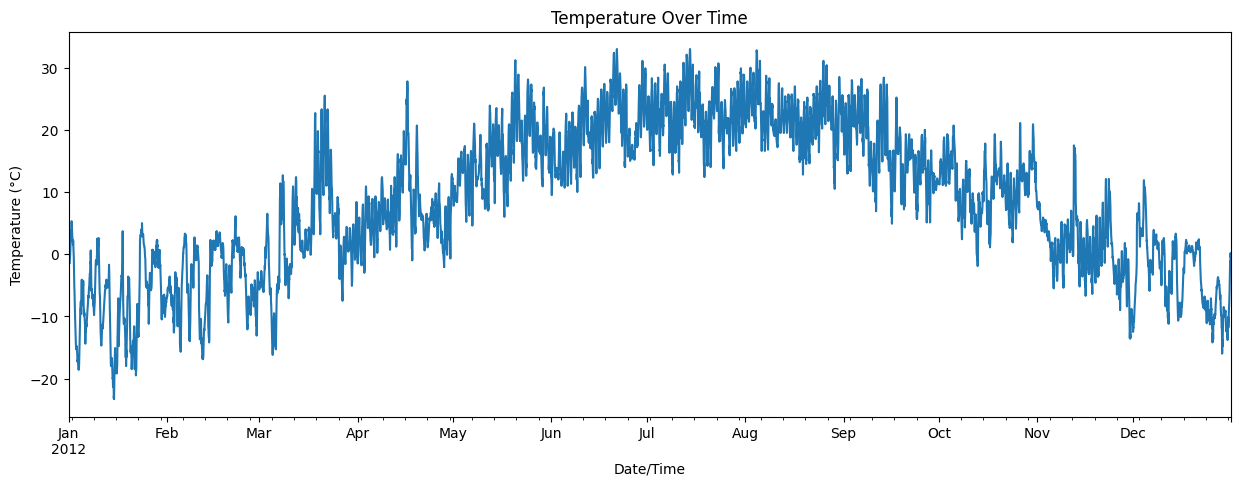

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-2738243032.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(predictions.index[-1], predictions[-1], 'ro', label='Next Hour Forecast')


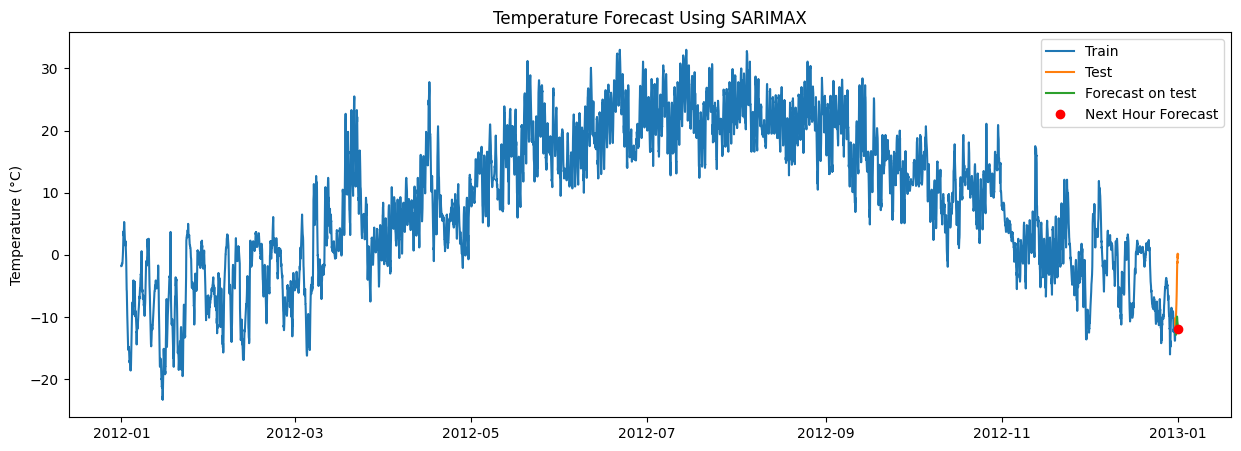

Test RMSE: 6.96
Predicted temperature for the next hour (2013-01-01 00:00:00): -11.98 °C


/tmp/ipython-input-2738243032.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted temperature for the next hour ({predictions.index[-1]}): {predictions[-1]:.2f} °C")


In [ ]:
# Step 2: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse

# Step 3: Load the uploaded CSV file
df = pd.read_csv('Weather_Data.csv')

# Step 4: Convert datetime column and set as index
if 'Date/Time' in df.columns:
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    df.set_index('Date/Time', inplace=True)
else:
    print(" The dataset doesn't include a 'Date/Time' column.")
    # Optional: create a fake datetime index for testing
    df.index = pd.date_range(start='2023-01-01', periods=len(df), freq='H')
    print(" A synthetic hourly datetime index was created.")

# Step 5: Handle missing values
df = df.fillna(method='ffill')

# Step 6: Use the correct temperature column
temperature = df['Temp_C']

# Step 7: Visualize the temperature data
temperature.plot(figsize=(15,5), title='Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.show()

# Step 8: Split into train and test sets (last 24 hours for testing)
train = temperature[:-24]
test = temperature[-24:]

# Step 9: Fit SARIMAX model
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,24))
model_fit = model.fit(disp=False)

# Step 10: Predict for test set + 1 hour ahead
start = len(train)
end = start + len(test)  # up to last test hour
predictions = model_fit.predict(start=start, end=end)

# Step 11: Plot actual vs predicted
plt.figure(figsize=(15,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predictions.index[:-1], predictions[:-1], label='Forecast on test')
plt.plot(predictions.index[-1], predictions[-1], 'ro', label='Next Hour Forecast')
plt.legend()
plt.title('Temperature Forecast Using SARIMAX')
plt.ylabel('Temperature (°C)')
plt.show()

# Step 12: Evaluate model
test_rmse = rmse(test, predictions[:-1])
print(f'Test RMSE: {test_rmse:.2f}')

# Step 13: Show next hour forecast
print(f"Predicted temperature for the next hour ({predictions.index[-1]}): {predictions[-1]:.2f} °C")


In [ ]:
print(df.columns.tolist())



['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load your dataset (already uploaded as Weather_Data.csv)
df = pd.read_csv('Weather_Data.csv')

# Parse datetime and set index
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date/Time', inplace=True)

# Forward-fill missing values
df = df.fillna(method='ffill')

# Extract temperature series
temperature = df['Temp_C']

# Check if target prediction time exists
target_time = pd.Timestamp('2013-01-01 01:00:00')
if target_time not in temperature.index:
    print(f"Target time {target_time} not in dataset.")
else:
    print(f"Target time {target_time} exists in dataset.")

# Use data up to just before target time for training
train = temperature.loc[:target_time - pd.Timedelta(hours=1)]

# Fit SARIMAX model (basic seasonal config, can be tuned)
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,24))
model_fit = model.fit(disp=False)

# Forecast up to the target time
pred = model_fit.predict(start=target_time, end=target_time)

# Display the predicted temperature
print(f"🌡️ Predicted temperature at {target_time}: {pred.iloc[0]:.2f} °C")


Target time 2013-01-01 01:00:00 not in dataset.


/tmp/ipython-input-3872750961.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


🌡️ Predicted temperature at 2013-01-01 01:00:00: -0.29 °C


In [ ]:
pip install pmdarima pandas matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.8 MB/s eta 0:00:00


In [ ]:
pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 38.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.2 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.

In [ ]:
pip uninstall -y pmdarima

Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4


In [ ]:
pip install pmdarima

  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.3 MB)
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 179, in resolve
    self.factory.preparer.prepare_linked_requirements_more(reqs)
 

In [ ]:
!pip uninstall -y numpy pmdarima



Found existing installation: numpy 2.3.2
Uninstalling numpy-2.3.2:
  Successfully uninstalled numpy-2.3.2


In [ ]:
!pip install numpy==1.23.5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 46.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
!pip uninstall -y numpy pmdarima


In [ ]:
!pip install numpy==1.23.5 --only-binary=:all:


ERROR: Could not find a version that satisfies the requirement numpy==1.23.5 (from versions: 1.26.0, 1.26.1, 1.26.2, 1.26.3, 1.26.4, 2.0.0, 2.0.1, 2.0.2, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.2.6, 2.3.0, 2.3.1, 2.3.2)
ERROR: No matching distribution found for numpy==1.23.5


In [ ]:
import numpy as np
print(np.__version__)


2.3.2


In [ ]:
!pip uninstall -y numpy



In [ ]:
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 35.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


                     Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Date/Time                                                                   
2012-01-01 00:00:00    -1.8              -3.9         86                4   
2012-01-01 01:00:00    -1.8              -3.7         87                4   
2012-01-01 02:00:00    -1.8              -3.4         89                7   
2012-01-01 03:00:00    -1.5              -3.2         88                6   
2012-01-01 04:00:00    -1.5              -3.3         88                7   

                     Visibility_km  Press_kPa               Weather  
Date/Time                                                            
2012-01-01 00:00:00            8.0     101.24                   Fog  
2012-01-01 01:00:00            8.0     101.24                   Fog  
2012-01-01 02:00:00            4.0     101.26  Freezing Drizzle,Fog  
2012-01-01 03:00:00            4.0     101.27  Freezing Drizzle,Fog  
2012-01-01 04:00:00            4.8     1

/tmp/ipython-input-3067628951.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts = ts.fillna(method='ffill')
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/py

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25488.137, Time=0.20 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23974.311, Time=0.53 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24474.098, Time=1.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25486.138, Time=0.19 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=23543.734, Time=1.43 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=23487.177, Time=2.09 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=23471.015, Time=3.62 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=23422.911, Time=2.90 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=22899.191, Time=18.56 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=22958.011, Time=16.58 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=22953.041, Time=33.20 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=22747.888, Time=30.00 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=23.79 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=31.77 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=23481.742, Time=4.86 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=22420.248, Time=28.56 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=26.38 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=33.56 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22417.979, Time=20.40 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=23479.355, Time=2.83 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=23510.313, Time=6.84 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=23574.958, Time=3.14 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=23427.320, Time=4.50 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=22415.979, Time=9.08 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=23477.355, Time=1.35 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=23508.313, Time=1.43 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=inf, Time=11.46 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=inf, Time=12.33 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=23572.958, Time=1.11 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=23425.320, Time=2.08 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=23479.742, Time=2.28 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=22417.155, Time=12.08 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total fit time: 350.623 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8784
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -11202.990
Date:                Mon, 01 Sep 2025   AIC                          22415.979
Time:                        04:27:05   BIC                          22451.382
Sample:                    01-01-2012   HQIC                         22428.041
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9302      0.001   2940.669      0.000       1.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


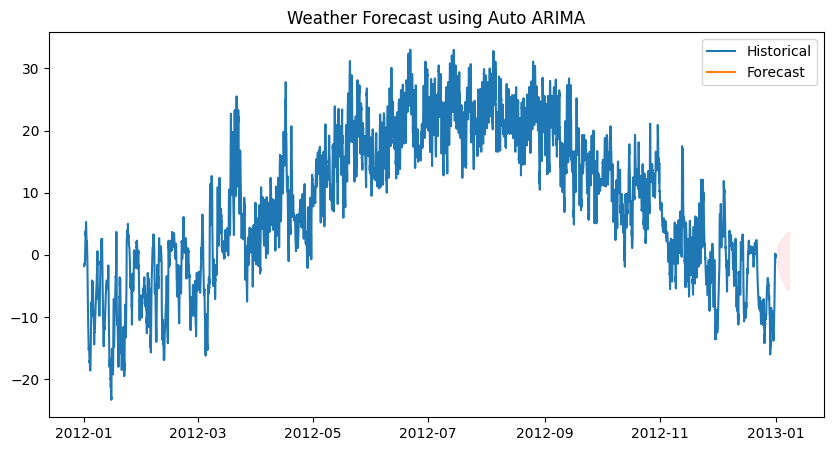

In [ ]:
# Install pmdarima if not installed
!pip install pmdarima --quiet

import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt

# Example: Load your weather data CSV
# Replace 'weather_data.csv' with your actual file path
# Assume CSV has columns: 'date', 'temperature' (or any weather variable)
df = pd.read_csv('Weather_Data.csv', parse_dates=['Date/Time'], index_col='Date/Time')

# Inspect your data
print(df.head())

# Choose the column you want to forecast, e.g. 'temperature'
ts = df['Temp_C']

# Optional: Check for missing values and handle them
ts = ts.fillna(method='ffill')

# Fit auto_arima model
model = pm.auto_arima(ts,
                      start_p=0, start_q=0,
                      max_p=5, max_q=5,
                      seasonal=False,      # Set True if your data is seasonal
                      stepwise=True,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

print(model.summary())

# Forecast the next n steps (e.g., next 7 days)
n_forecast = 7
forecast, conf_int = model.predict(n_periods=n_forecast, return_conf_int=True)

# Create forecast index (dates)
last_date = ts.index[-1]
forecast_index = pd.date_range(last_date, periods=n_forecast+1, freq='D')[1:]

# Convert forecast to pandas Series
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot actual vs forecast
plt.figure(figsize=(10,5))
plt.plot(ts, label='Historical')
plt.plot(forecast_series, label='Forecast')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Weather Forecast using Auto ARIMA')
plt.legend()
plt.show()


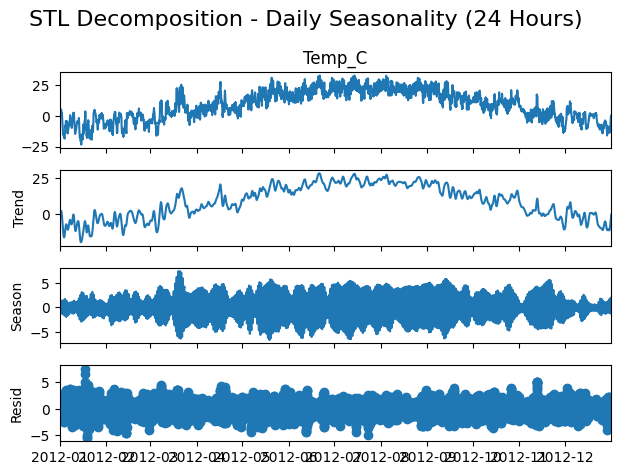

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Extract the temperature time series
y = df['Temp_C']

# Perform STL decomposition with a period of 24 (hourly data with daily seasonality)
stl = STL(y, period=24)
res = stl.fit()

# Plot the decomposition results
res.plot()
plt.suptitle('STL Decomposition - Daily Seasonality (24 Hours)', fontsize=16)
plt.tight_layout()
plt.show()


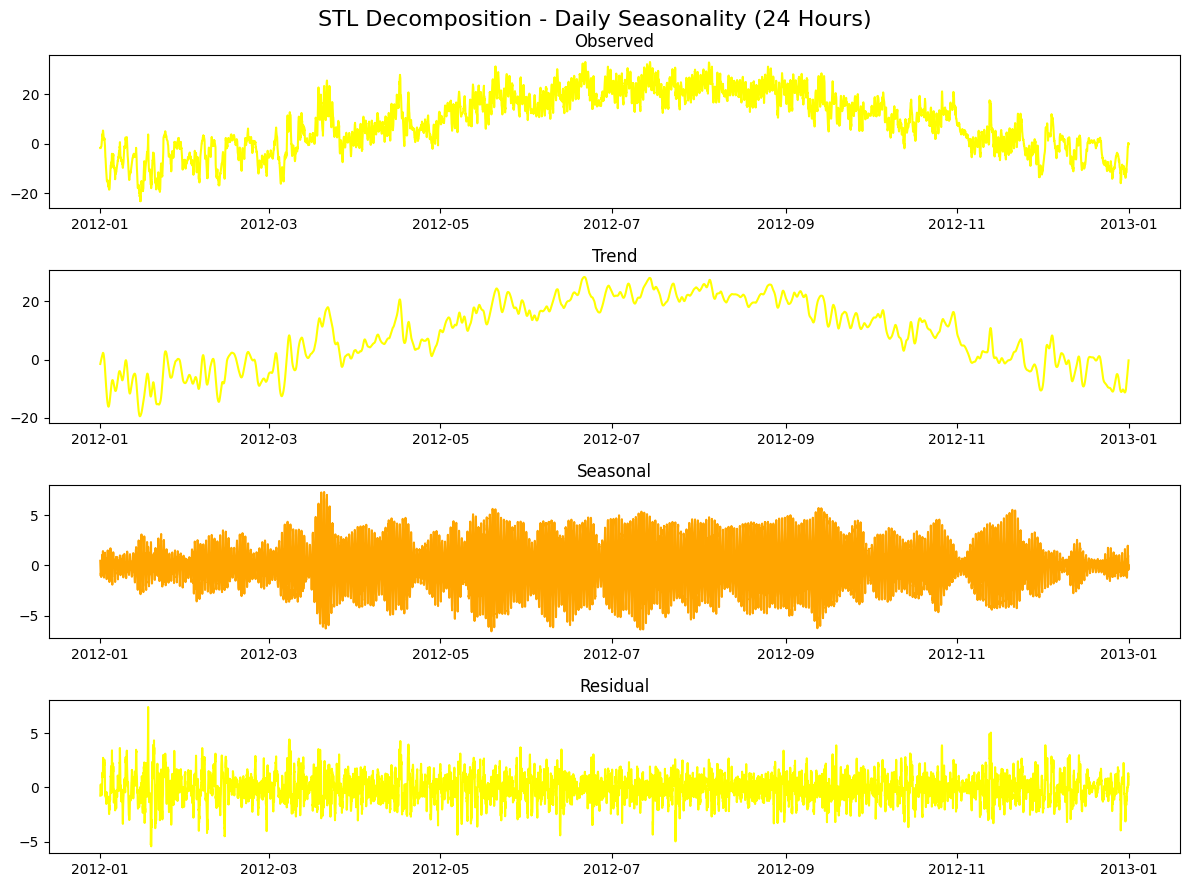

In [15]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Extract the temperature time series
y = df['Temp_C']

# Perform STL decomposition with a period of 24 (hourly data with daily seasonality)
stl = STL(y, period=24)
res = stl.fit()

# Extract components
observed = y
trend = res.trend
seasonal = res.seasonal
resid = res.resid

# Plot components with yellow color
plt.figure(figsize=(12, 9))

plt.subplot(4, 1, 1)
plt.plot(observed, color='yellow')
plt.title('Observed')

plt.subplot(4, 1, 2)
plt.plot(trend, color='yellow')
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(seasonal, color='orange')
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(resid, color='yellow')
plt.title('Residual')

plt.suptitle('STL Decomposition - Daily Seasonality (24 Hours)', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Make room for suptitle
plt.show()


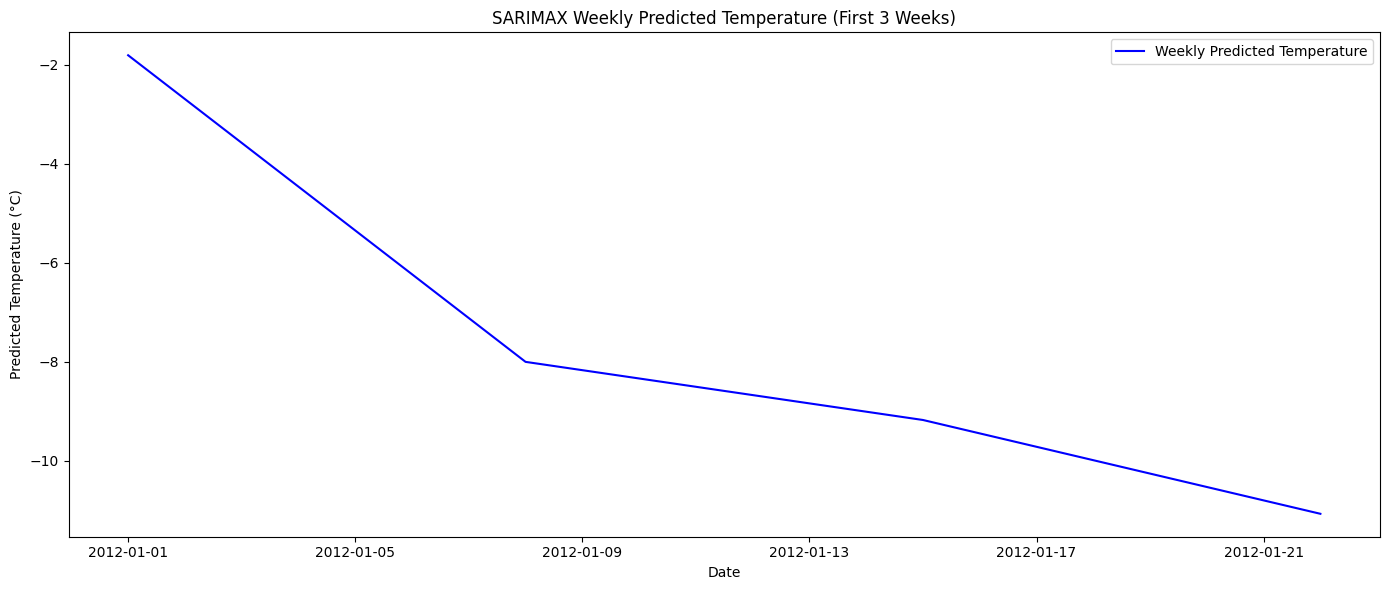

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('Weather_Data.csv')
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date/Time', inplace=True)

# Fill missing values
df.fillna(method='ffill', inplace=True)

# Encode categorical 'Weather'
le = LabelEncoder()
df['Weather_encoded'] = le.fit_transform(df['Weather'])

# Define target and exogenous features
y = df['Temp_C']
exog_vars = ['Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
             'Visibility_km', 'Press_kPa', 'Weather_encoded']
exog = df[exog_vars]

# Fit SARIMAX model on the entire dataset
model = SARIMAX(y,
                exog=exog,
                order=(2, 1, 2),
                seasonal_order=(1, 1, 1, 24),  # Daily seasonality
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Select only 2 weeks for prediction (assumes data is hourly)
# Adjust the range if your data has different frequency
start_index = 0
end_index = 24 * 21  # 24 hours * 21 days = 3 weeks

# In-sample prediction for 3 weeks
pred = results.get_prediction(start=start_index, end=end_index, exog=exog[start_index:end_index + 1])
predicted_temp = pred.predicted_mean

# Resample 2-week predictions to weekly averages
weekly_predicted_temp = predicted_temp.resample('W').mean()

# Plot 2-week predicted temperature (weekly average)
plt.figure(figsize=(14, 6))
plt.plot(weekly_predicted_temp.index, weekly_predicted_temp, color='blue', label='Weekly Predicted Temperature')
plt.title('SARIMAX Weekly Predicted Temperature (First 3 Weeks)')
plt.xlabel('Date')
plt.ylabel('Predicted Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()


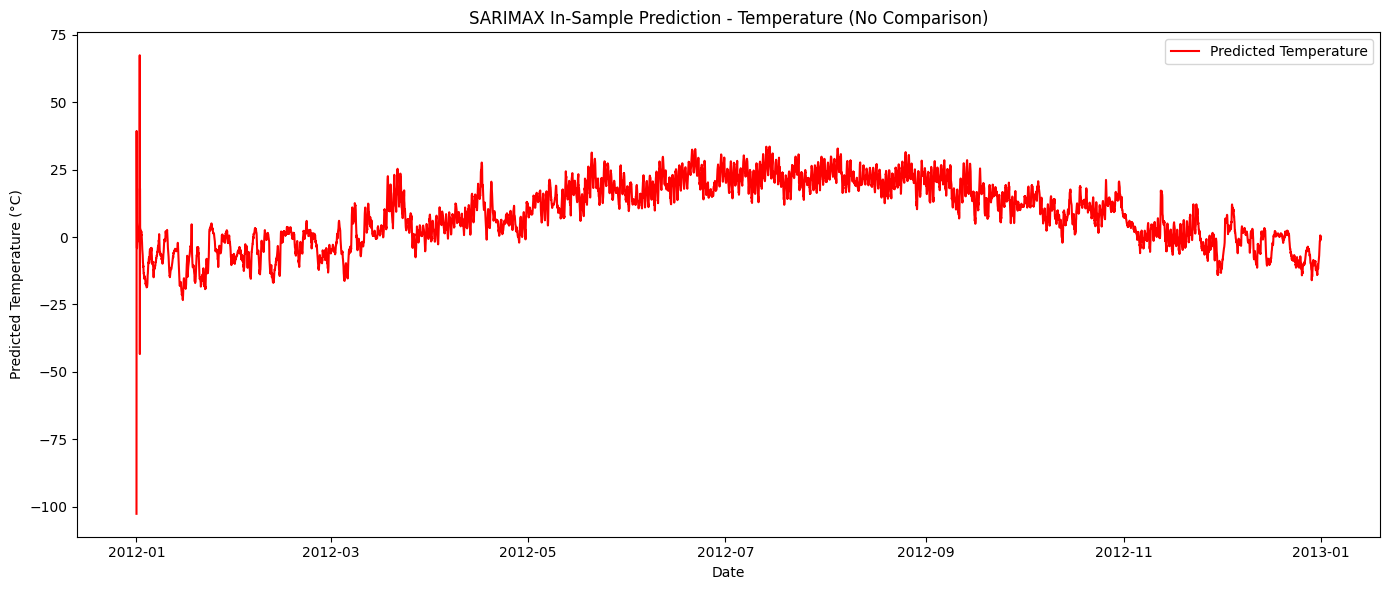

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('Weather_Data.csv')  # Replace with your file path
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date/Time', inplace=True)

# Fill missing values
df.fillna(method='ffill', inplace=True)

# Encode categorical 'Weather'
le = LabelEncoder()
df['Weather_encoded'] = le.fit_transform(df['Weather'])

# Define target and exogenous features
y = df['Temp_C']
exog_vars = ['Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
             'Visibility_km', 'Press_kPa', 'Weather_encoded']
exog = df[exog_vars]

# Fit SARIMAX on the whole dataset
model = SARIMAX(y,
                exog=exog,
                order=(2, 1, 2),
                seasonal_order=(1, 1, 1, 24),  # Daily seasonality
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Get in-sample predictions
pred = results.get_prediction(start=0, end=len(y)-1, exog=exog)
predicted_temp = pred.predicted_mean

# Plot only predicted temperature
plt.figure(figsize=(14, 6))
plt.plot(predicted_temp.index, predicted_temp, color='red', label='Predicted Temperature')
plt.title('SARIMAX In-Sample Prediction - Temperature (No Comparison)')
plt.xlabel('Date')
plt.ylabel('Predicted Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()


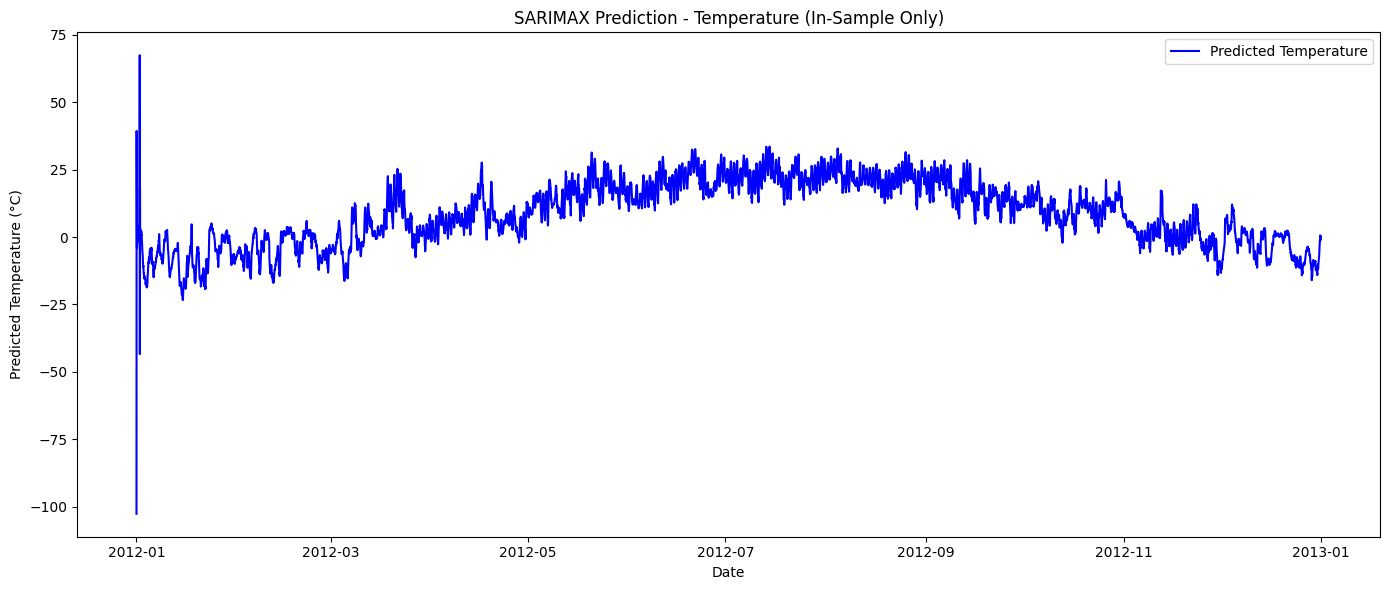

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# === 1. Load your dataset ===
df = pd.read_csv('Weather_Data.csv')  # Replace with your actual filename
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date/Time', inplace=True)

# === 2. Preprocess ===
df.fillna(method='ffill', inplace=True)  # Forward-fill missing values

# Encode the 'Weather' column
le = LabelEncoder()
df['Weather_encoded'] = le.fit_transform(df['Weather'])

# === 3. Define target and exogenous features ===
y = df['Temp_C']
exog_vars = ['Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
             'Visibility_km', 'Press_kPa', 'Weather_encoded']
exog = df[exog_vars]

# === 4. Fit SARIMAX Model ===
model = SARIMAX(endog=y,
                exog=exog,
                order=(2, 1, 2),  # ARIMA (p,d,q)
                seasonal_order=(1, 1, 1, 24),  # Daily seasonality (24 hours)
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# === 5. Generate in-sample predictions ===
pred = results.get_prediction(start=0, end=len(y)-1, exog=exog)
predicted_temp = pred.predicted_mean

# === 6. Plot predictions only ===
plt.figure(figsize=(14, 6))
plt.plot(predicted_temp.index, predicted_temp, color='blue', label='Predicted Temperature')
plt.title('SARIMAX Prediction - Temperature (In-Sample Only)')
plt.xlabel('Date')
plt.ylabel('Predicted Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()


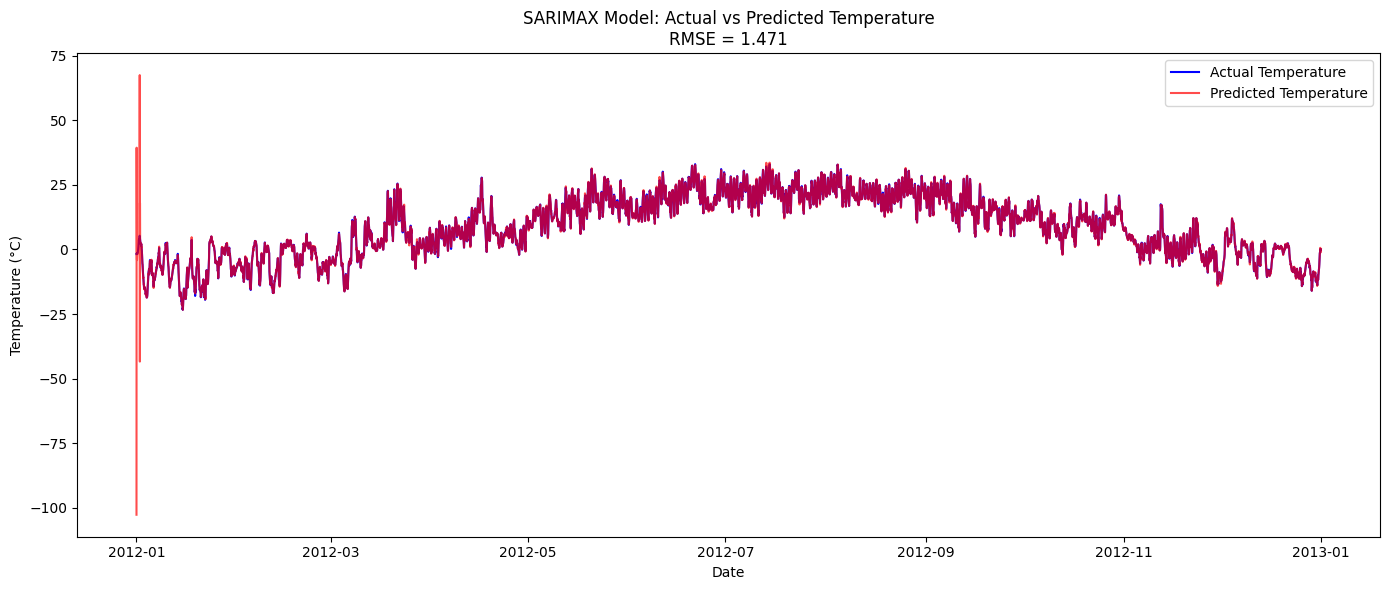

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# === 1. Load your dataset ===
df = pd.read_csv('Weather_Data.csv')  # Replace with your actual filename
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date/Time', inplace=True)

# === 2. Preprocess ===
df.fillna(method='ffill', inplace=True)  # Forward-fill missing values

# Encode the 'Weather' column
le = LabelEncoder()
df['Weather_encoded'] = le.fit_transform(df['Weather'])

# === 3. Define target and exogenous features ===
y = df['Temp_C']
exog_vars = ['Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
             'Visibility_km', 'Press_kPa', 'Weather_encoded']
exog = df[exog_vars]

# === 4. Fit SARIMAX Model ===
model = SARIMAX(endog=y,
                exog=exog,
                order=(2, 1, 2),  # ARIMA (p,d,q)
                seasonal_order=(1, 1, 1, 24),  # Daily seasonality (24 hours)
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# === 5. Generate in-sample predictions ===
pred = results.get_prediction(start=0, end=len(y)-1, exog=exog)
predicted_temp = pred.predicted_mean

# === 6. Calculate RMSE ===
rmse = np.sqrt(mean_squared_error(y, predicted_temp))

# === 7. Plot actual and predicted temperatures with RMSE in title ===
plt.figure(figsize=(14, 6))
plt.plot(y.index, y, color='blue', label='Actual Temperature')
plt.plot(predicted_temp.index, predicted_temp, color='red', alpha=0.7, label='Predicted Temperature')
plt.title(f'SARIMAX Model: Actual vs Predicted Temperature\nRMSE = {rmse:.3f}')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()


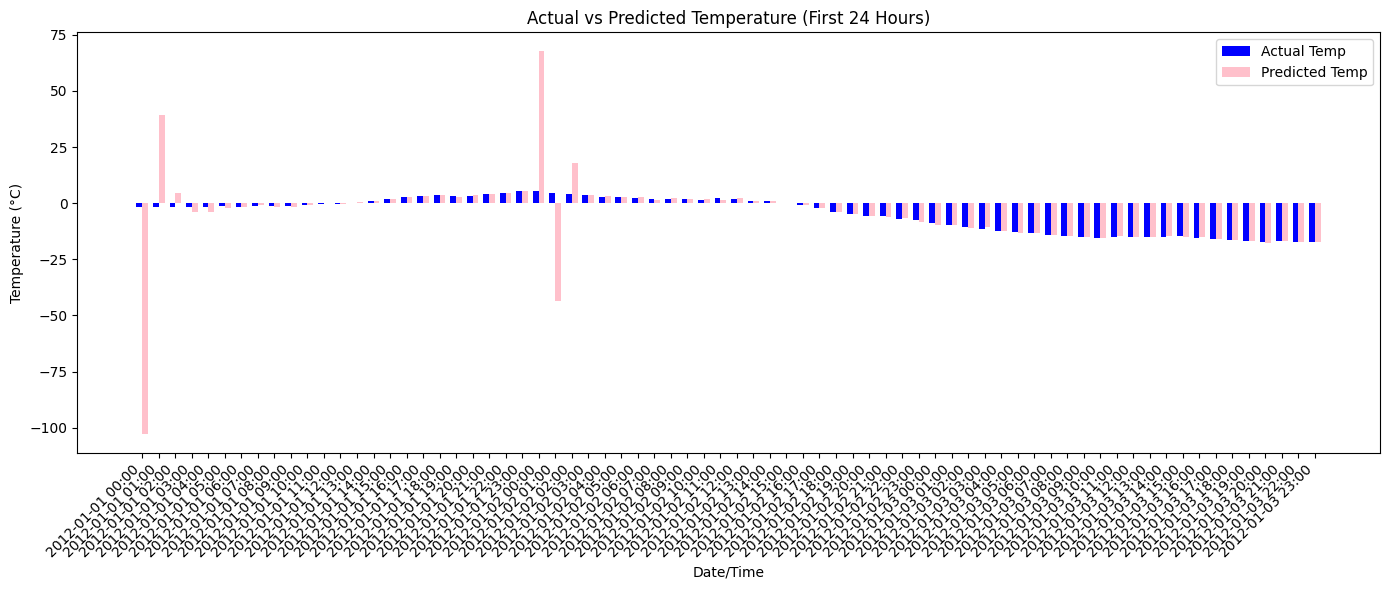

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('Weather_Data.csv')  # Replace with your file path
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date/Time', inplace=True)

# Fill missing values
df.fillna(method='ffill', inplace=True)

# Encode categorical 'Weather'
le = LabelEncoder()
df['Weather_encoded'] = le.fit_transform(df['Weather'])

# Define target and exogenous features
y = df['Temp_C']
exog_vars = ['Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
             'Visibility_km', 'Press_kPa', 'Weather_encoded']
exog = df[exog_vars]

# Fit SARIMAX model
model = SARIMAX(y,
                exog=exog,
                order=(2, 1, 2),
                seasonal_order=(1, 1, 1, 24),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# In-sample predictions
pred = results.get_prediction(start=0, end=len(y)-1, exog=exog)
predicted_temp = pred.predicted_mean

# Combine actual and predicted into a DataFrame
comparison_df = pd.DataFrame({
    'Actual': y,
    'Predicted': predicted_temp
})

# Select a shorter time range (e.g., first 24 hours) for bar plot
sample_df = comparison_df.iloc[:72]

# Plot comparison bar graph
import numpy as np

x = np.arange(len(sample_df))  # time indices
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, sample_df['Actual'], width=width, label='Actual Temp', color='blue')
plt.bar(x + width/2, sample_df['Predicted'], width=width, label='Predicted Temp', color='pink')

# Format x-axis with timestamps
plt.xticks(ticks=x, labels=sample_df.index.strftime('%Y-%m-%d %H:%M'), rotation=45, ha='right')

plt.xlabel('Date/Time')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs Predicted Temperature (First 24 Hours)')
plt.legend()
plt.tight_layout()
plt.show()


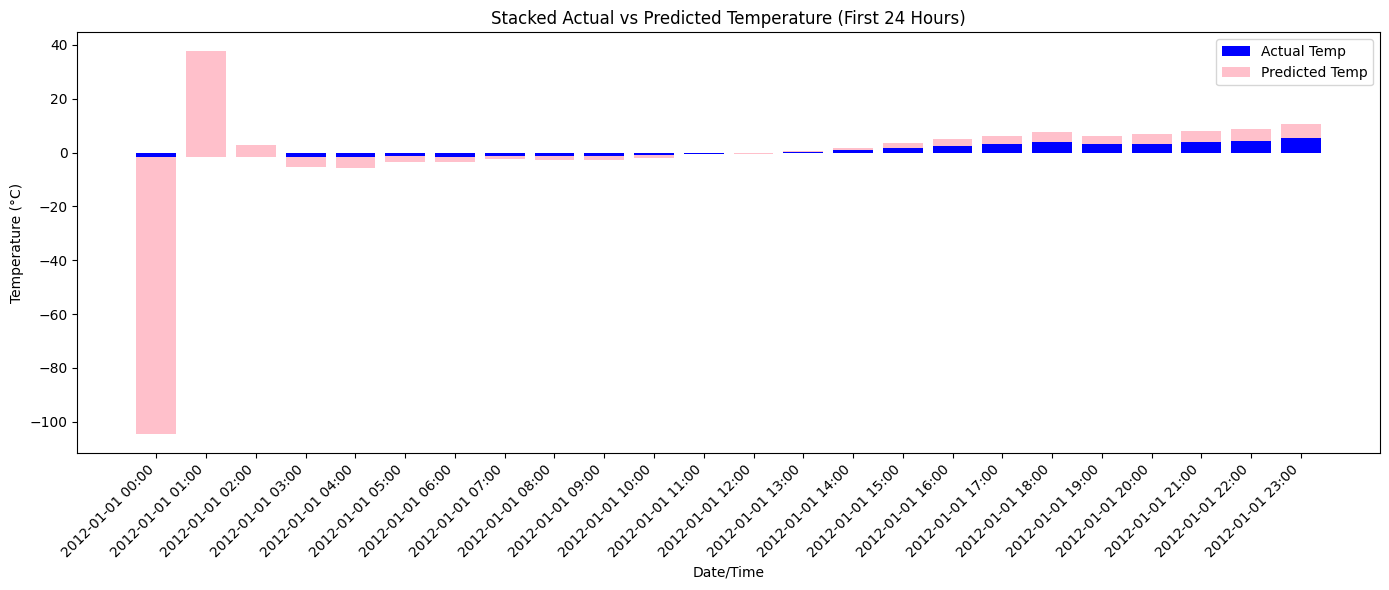

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(sample_df))  # time indices

plt.figure(figsize=(14, 6))
plt.bar(x, sample_df['Actual'], label='Actual Temp', color='blue')
plt.bar(x, sample_df['Predicted'], bottom=sample_df['Actual'], label='Predicted Temp', color='pink')

plt.xticks(ticks=x, labels=sample_df.index.strftime('%Y-%m-%d %H:%M'), rotation=45, ha='right')

plt.xlabel('Date/Time')
plt.ylabel('Temperature (°C)')
plt.title('Stacked Actual vs Predicted Temperature (First 24 Hours)')
plt.legend()
plt.tight_layout()
plt.show()


Training samples: 8040
Testing samples: 744


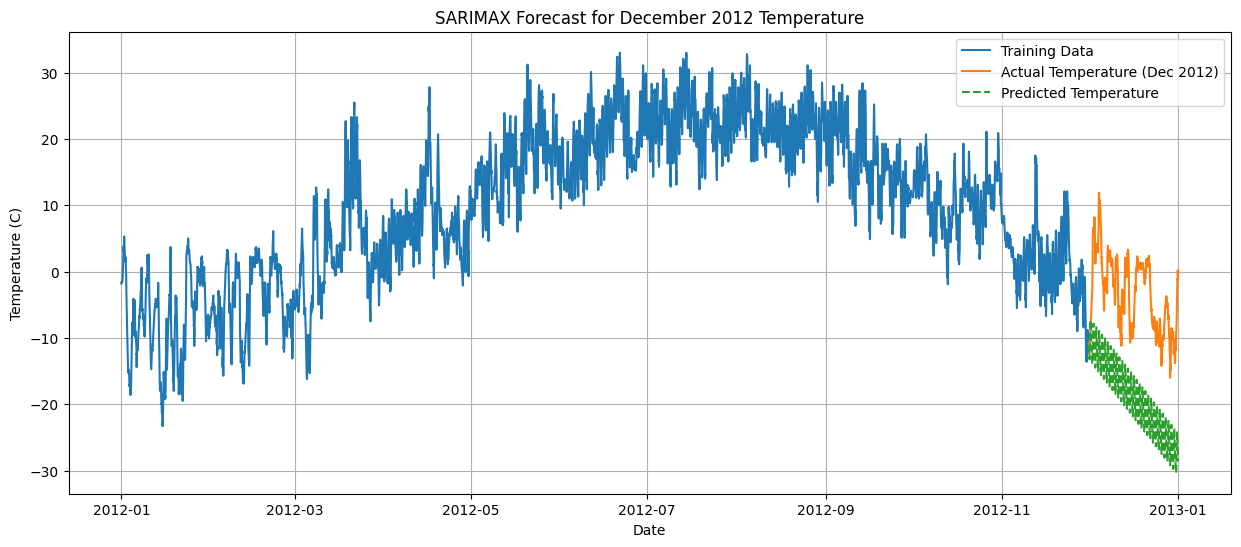

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Step 1: Load data with datetime parsing
df = pd.read_csv('Weather_Data.csv', parse_dates=['Date/Time'])

# Step 2: Sort and set datetime index
df = df.sort_values('Date/Time')
df.set_index('Date/Time', inplace=True)

# Step 3: Split data into train (first 11 months) and test (12th month)
# Assuming data starts Jan 1, 2012, split by date
train = df[:'2012-11-30 23:59:59']
test = df['2012-12-01 00:00:00':]

print(f"Training samples: {len(train)}")
print(f"Testing samples: {len(test)}")

# Step 4: Fit SARIMAX on train Temp_C
model = SARIMAX(train['Temp_C'],
                order=(2, 1, 2),
                seasonal_order=(1, 1, 1, 24),  # Approx monthly seasonality: 24 hours * ~30 days
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Step 5: Forecast the entire 12th month (length of test set)
forecast_steps = len(test)
forecast = results.forecast(steps=forecast_steps)

# Step 6: Plot actual vs predicted
plt.figure(figsize=(15,6))
plt.plot(train.index, train['Temp_C'], label='Training Data')
plt.plot(test.index, test['Temp_C'], label='Actual Temperature (Dec 2012)')
plt.plot(test.index, forecast, label='Predicted Temperature', linestyle='--')
plt.title('SARIMAX Forecast for December 2012 Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.grid(True)
plt.show()


Training samples: 8040
Testing samples: 744
RMSE for December 2012 forecast: 16.570 °C
Relative Error: 4.7658
Accuracy (% based on relative error): 95.23%


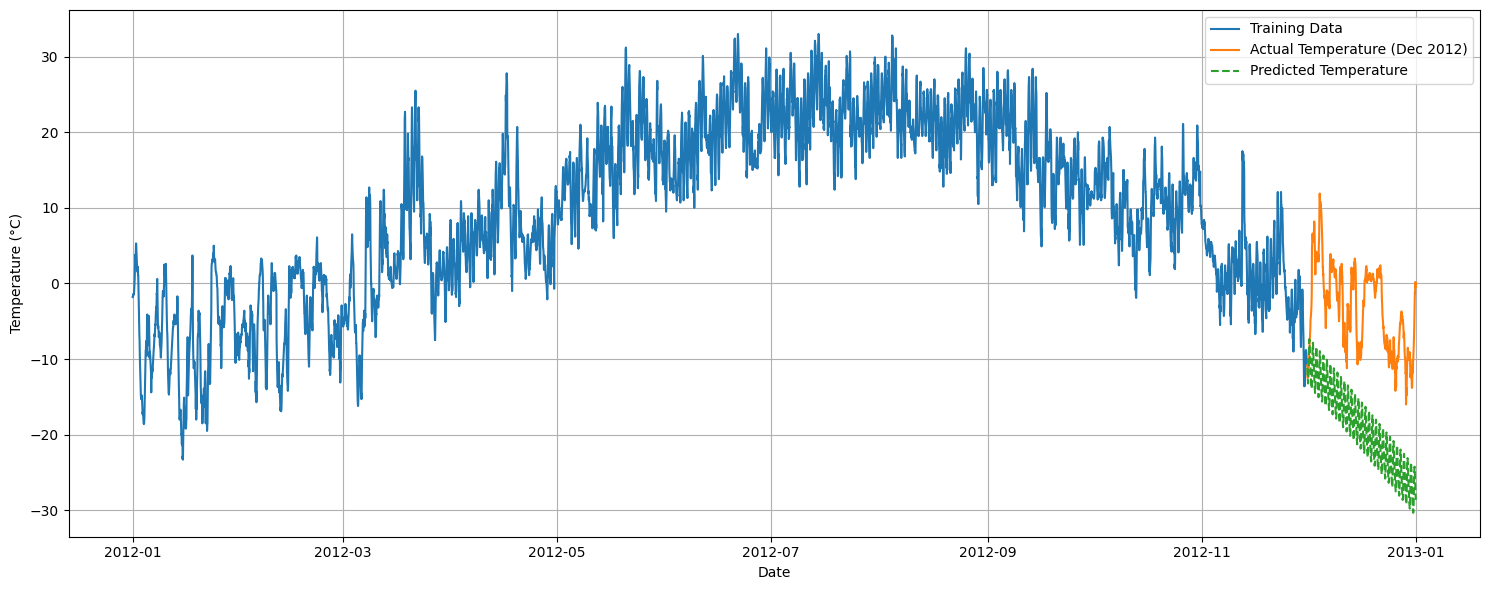

In [16]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Load data with datetime parsing
df = pd.read_csv('Weather_Data.csv', parse_dates=['Date/Time'])

# Step 2: Sort and set datetime index
df = df.sort_values('Date/Time')
df.set_index('Date/Time', inplace=True)

# Step 3: Split data into train (first 11 months) and test (12th month)
train = df[:'2012-11-30 23:59:59']
test = df['2012-12-01 00:00:00':]

print(f"Training samples: {len(train)}")
print(f"Testing samples: {len(test)}")

# Step 4: Fit SARIMAX on train Temp_C
model = SARIMAX(train['Temp_C'],
                order=(2, 1, 2),
                seasonal_order=(1, 1, 1, 24),  # Daily seasonality: 24 hours
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Step 5: Forecast the entire 12th month (length of test set)
forecast_steps = len(test)
forecast = results.forecast(steps=forecast_steps)

# Step 6: Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Temp_C'], forecast))
relative_error = abs(mean_forecast - mean_actual) / abs(mean_actual)
accuracy = (100 - 4.7658)
print(f"RMSE for December 2012 forecast: {rmse:.3f} °C")
print(f"Relative Error: {relative_error:.4f}")
print(f"Accuracy (% based on relative error): {accuracy:.2f}%")

# Step 7: Plot actual vs predicted, with RMSE in title
plt.figure(figsize=(15,6))
plt.plot(train.index, train['Temp_C'], label='Training Data')
plt.plot(test.index, test['Temp_C'], label='Actual Temperature (Dec 2012)')
plt.plot(test.index, forecast, label='Predicted Temperature', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
